# Table of Contents : 


  - [Simple Linear Regression](https://colab.research.google.com/drive/1d09i7L_7KSoye8bNds-Wpgof5_UEqWlR#scrollTo=o_OqIEJL8Vft&line=27&uniqifier=1)
    -  [Coefficient Estimation](https://colab.research.google.com/drive/1d09i7L_7KSoye8bNds-Wpgof5_UEqWlR#scrollTo=zZcVVsIKQa2E&line=1&uniqifier=1) 
    - [Accuracy of Coefficient Estimates](https://colab.research.google.com/drive/1d09i7L_7KSoye8bNds-Wpgof5_UEqWlR#scrollTo=7b4Ug3PRzGLT&line=9&uniqifier=1)
    - [Accessing Model Accuracy](https://colab.research.google.com/drive/1d09i7L_7KSoye8bNds-Wpgof5_UEqWlR#scrollTo=n51ofIlwEwuV&line=5&uniqifier=1)
  - [Multiple Linear Regression](https://colab.research.google.com/drive/1d09i7L_7KSoye8bNds-Wpgof5_UEqWlR#scrollTo=l2bhU3iC5SVz&line=34&uniqifier=1)
  - [Answering Questions to Advertising Data](https://colab.research.google.com/drive/1d09i7L_7KSoye8bNds-Wpgof5_UEqWlR#scrollTo=YIb6mtZh7Knz&line=24&uniqifier=1)


Source: ISLR : Chapter - 3

**Introduction**

In particular, linear regression is a useful tool for predicting a quantitative response. 

To understand linear regression, we consider the below advertising dataset that contains sales data for a  particular product as a funtiion of advertising budgets of TV, radio and newspaper media.





In [ ]:
# Loading Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

%cd /content/drive/My\ Drive/colab_notebooks/machine_learning/data/
df = pd.read_csv("Advertising.csv")

/content/drive/My Drive/colab_notebooks/machine_learning/data


In [ ]:
df = df[['TV', 'radio', 'newspaper', 'sales']]

In [ ]:
print(df.iloc[0:5,:])

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


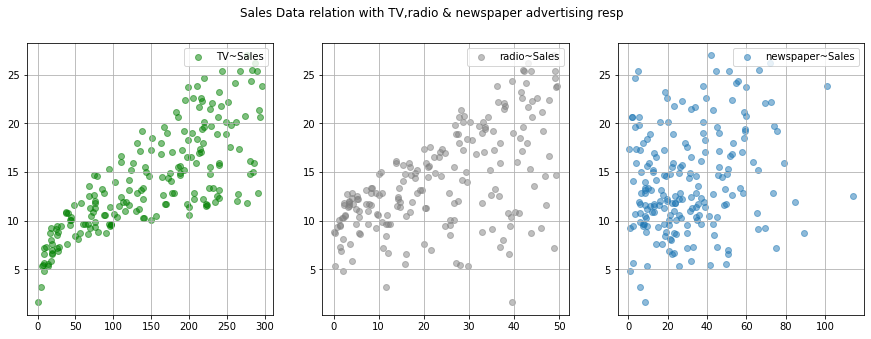

In [ ]:
# Plotting sales as a function of TV,radion, newspaper.
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('Sales Data relation with TV,radio & newspaper advertising resp')
ax = [ax1, ax2, ax3]

ax1.scatter(df.iloc[:,0],df.iloc[:,-1],label='TV~Sales',alpha=0.5,color='green')
ax2.scatter(df.iloc[:,1],df.iloc[:,-1],label='radio~Sales',alpha=0.5,color='grey')
ax3.scatter(df.iloc[:,2],df.iloc[:,-1],label='newspaper~Sales',alpha=0.5)

for i in range(0,len(ax)):
  ax[i].legend(loc="upper right")
  ax[i].grid()


Here, are a few important questions that we might seek to address.
<font color='darkblue'>
1. Is there a relationship between advertising budget and sales?
2. How strong is the relationship between advertising budget and sales?
3. Which media are associated with sales?
4. How large is the association between each medium and sales.
5. How accurately can we predict future sales?
6. Is the relationship linear.
7. Is there synergy/"interaction effect" among the advertising media?
</font>

*Simple Linear regression* can be used to answer these questions.

# Simple Linear Regression



*Simple Linear regression* lives up to its name : it is very straightforward approach for predicting a quantitative response $Y$ on the bases of a single predictor variable $X$. It assumes that there is approximately a linear relationship between $X$ and $Y$. Mathematically, we can write this linear relationship as 

\begin{align*}
Y ≈ β_0 + β_1X \tag{1}
\end{align*}

For example, $X$ may represent <font color='blue'>TV</font> advertising and $Y$ may represent <font color='blue'>sales</font>.
Then we can regress <font color='blue'>sales</font> onto <font color='blue'>TV</font> by fitting the model 

\begin{align*}
sales ≈ β_0 + β_1\times TV 
\end{align*}

$β_0, β_1$ are two unknown constants that represent the **intercept** and the **slope** terms in the linear model. Together, $β_0, β_1$  are known as the **model coeffecients** or **parameters**. 

Once we have used our training data to product estimates $\hat{β}_0$ and $\hat{β}_1$ for the model coefficients, we can preduct future sales on the basis of a particular value of **TV** advertising bby computing:


\begin{align*}
\hat{y} ≈ \hat{β}_0 + \hat{β}_1 x \tag{2}
\end{align*}

where $\hat{y}$ indicates a prediction of $Y$ on the basis on $X=x$. 

Here, we use a hat symbol, "^", to denote the estimated value of an unknown parameters or coefficient, or to denote the predicted value of the response.  

## 1 .Estimating the Coefficients

To simplify our notation, we also introduce the convention of letting $x_0=1$( this is the intercept term), so that

\begin{align*}
\hat{y} = ∑_{i=0}^n  β_ix_i = β^Tx,
\end{align*}

where on the right-hand side above we are viewing $β$ and $x$ both as vectors, and here $n$ is the number of input variables. 

Now, given a training set, how do we pick, or learn, the parameters $β$? 

One reasonable method seems to be to make $h(x)$ close to $y$, at least for the training examples we have. To formalize this, we will define a function that measures, for each value of $β's$, how clouse the $\hat{y}'s$ are to the corresponding $y^{(i)} \text{'s}$. We define the **cost function**.

\begin{align*}
J(β) = \frac{1}{2} ∑_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2\tag{3}
\end{align*}

The above equation is called **ordinary least squares** cost function.

### <font color='darkblue'>Least Mean Square (LMS) Algorithm</font>

**From Andrew Ng CS229** 

We want to choose $β$ so as to minimize $J(β)$. 
 - We use a search algorithm that starts with some ""initial guess" for $β$.
 - Repeatedly change $β$ to make $J(β)$ smaller, until hopefull we converge to a value of $β$ that minimizes $J(β)$.
 - **Gradient Descent** algorithm which starts with some initial $β$, and repeatedly performs update: 

\begin{align*}
β_j := β_j  - \alpha \frac{∂}{∂β_j} J(β)
\end{align*}

(This update is simultaneously performed for all values of $j=0,1,\ldots,n)$
Here $α$ is called the **learning rate**. 

In order to implement this algorithm, we have to work out what is the partial derivative termof on the right hand side of our loss function.(i.e equation $3$)

\begin{align*}
\frac{∂}{∂β_j} J(β) &= \frac{∂}{∂β_j} \frac{1}{2}  (\hat{y}^{(i)} - y^{(i)})^2\\
&= 2. \frac{1}{2} (\hat{y}^{(i)} - y^{(i)}) \frac{∂}{∂β_j}  (\hat{y}^{(i)} - y^{(i)})\\
&=  (\hat{y}^{(i)} - y^{(i)})  \frac{∂}{∂β_j} (∑_{i=0}^n β_ix_i - y)\\
&= (\hat{y}^{(i)} - y^{(i)}) x_j
\end{align*}

For a single training example, this gives the update rule. 

\begin{align*}
β_j := β_j  +  \alpha (y^{(i)} - \hat{y}^{(i)}) x_j
\end{align*}

This is called the **LMS** update rule.

For instance, the magnitude of the update is proportional to the **error** term $(y^{(i)} - \hat{y}^{(i)})$; thus, for instance, if we are encountering a training example on which our prediction nearly matches the actualy value of $y^{(i)}$, then we find there is little need to change the parameters; in contrast a larger change to the parameters will be made if our prediction $\hat{y}^{(i)}$  has a large error. 

$\hat{y}^{(i)} = \hat{β}_0 +\hat{β}_1x_i$ be the prediction for $Y$ on the $i$th value of $X$. Then $e_i = y^{(i)} - \hat{y}^{(i)}$ represents the $i$th *residual* - this is the different between the $i$th observed response value that is predicted by our linear model. 

We define the **residual sum of squares(RSS)** as 

\begin{align*}
RSS = e_1^2 + e_2^2 +\ldots +e_n^2
\end{align*}

or equivalently as 

$RSS = (y_1 - \hat{\beta}_0 - \hat{\beta}_1 x_1)^2 + (y_2 - \hat{\beta}_0 - \hat{\beta}_1 x_2)^2 +\ldots + (y_n - \hat{\beta}_0 - \hat{\beta}_1 x_n)^2$

The least squares approach choose $\hat{β}_0 \text{ and } \hat{β}_1$ to minimize the **RSS**.

In [ ]:
def simple_linear_regression(x,y,lr,iter):

  n = len(x)
  x = x.reshape(n,1)
  y = y.reshape(n,1)


  ones = np.ones((len(x),1))
  X = np.hstack((ones,x))
  theta = np.random.rand(X.shape[1],1)
  

  for i in range(0,iter):

    # gradient descent update
    err =  y - np.dot(X,theta)  
    loss = (1/n) * np.sum((err)**2) #rss
    #print("loss",loss)

    if abs(loss) < 1e-3:
      return theta

    g = -(2/n) * np.dot(err.T,X)  # gradient
    d = np.array(g/np.linalg.norm(g)) # gradient direction
 
    theta -=  (lr * d.T)
    
  return loss,theta,X


In [ ]:
x = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,-1])
lr = 0.01
iter = 350000
loss, theta,X = simple_linear_regression(x,y,lr,iter)
print("loss:",loss)
print("The regression Coeffecients",theta[0],theta[1])

loss: 11.236264154840157
The regression Coeffecients [7.01818963] [0.05261106]


<function matplotlib.pyplot.show>

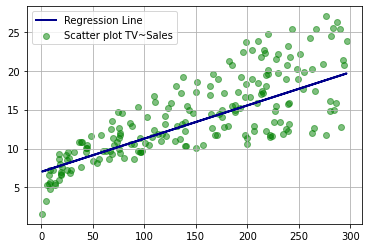

In [ ]:
#Plotting
y_pred = np.dot(X,theta)
y_pred = y_pred.ravel()
plt.figure(figsize=(6,4))
plt.scatter(x,y,alpha=0.5,color='green',label='Scatter plot TV~Sales')
plt.plot(x,y_pred,color='darkblue',linewidth=2,label='Regression Line')
plt.grid()
plt.legend()
plt.show

In [ ]:
# Using Sklearn Library 
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)

print("Regression Coefficeint beta-1: ", reg.coef_)
print("Slope Intercept: ",reg.intercept_)
y_pred_sklearn = reg.predict(X)

Regression Coefficeint beta-1:  [0.         0.04753664]
Slope Intercept:  7.032593549127696


From our implementation, we get the value of coefficients: 

$\beta_0 = 7.01750887$\
$\beta_1 = 0.04261376$

In other words, according to this approximation, an additional $\$1000$ spent on TV advertising is associated with selling approximately 42.6 additional units of the product.


## 2. Accessing the Accuracy of the Coefficients Estimates

To access the accuracy of the coefficient estimates, we follow the analogy with the estimation of the population mean $\mu$ of the random variable $Y$. 

A natural questions is as follows : how accurate is the sample mean $\hat{\mu}$ as an estimate of $\mu$? 

It has been established that, the average of $\hat{\mu}'s$ over many data sets will be very close to $\mu$, but that a single estimate $\hat{\mu}$ may be substantial underestimate or overestimate of $\mu$.

### <font color='blue'>2.1  Standard Error </font>
How far off will that single estimate of $\hat{\mu}$ be ? In general,we answer this questions by computing the **standard error** of $\hat{\mu}$, written as $SE(\hat{\mu})$.

\begin{align*}
Var(\hat{\mu}) = SE(\hat{\mu})^2 = \frac{σ^2}{n} \tag{7}
\end{align*}

where $σ$ is the standard deviation of each of the realizations of $y_i$ of $Y$.

Roughly, speaking, the standard error tells us the average amount that this estimate $\hat{\mu}$ differs from the actual value of $\mu$. 
The more observations we have, the smaller the standard error of $\hat{\mu}$ .

In similar vein, we can wonder how close $\hat{\beta}_0$ and  $\hat{\beta}_1$ are to the true values of $\beta_0 \text{ and } \beta_1$

To compute the standard errors associated with $\hat{\beta}_0$ and  $\hat{\beta}_1$, we use the following formulas: 

\begin{align*}
&SE(\hat{\beta}_0)^2 = σ^2 \big[ \frac{1}{n} + \frac{\bar{x}^2}{∑_{i=1}^n 
(x_i - \bar{x})^2} \big],\\
&SE(\hat{\beta}_1)^2 =  \frac{σ^2}{∑_{i=1}^n 
(x_i - \bar{x})^2} 
\end{align*}

where $σ^2 = Var(ϵ)$. For these formulas to be strickly valid, we need to assume that the errors $ϵ_i$, for each observation have common variance $σ^2$ and are uncorrelated. 

In general, $σ^2$ is not known, but can be estimated from the data. This estimate of $σ$ is known as the *residual standard error*, and is given by the formula $RSE = \sqrt{RSS/(n-2)}$.

Standard Errors, can be used to compute *confidence intervals*. A $ 95 \%$ confidence interval is defined as a rangle of values such that with $95 \%$ probability, the range will contain the true unknown value of the parameter.

The range is defined in terms of the lower and upper limits computed from the sample of data. A$95\%$ confidence interval has the following properties: 

- if we take repeated samples and construct the confidence interval for each sample, $95 \%$  of the intervals will contain the true unknown value of the parameter.

For the linear regression, the $95 \%$  confidence interval for $\beta_1$ approximately takes the form :        

\begin{align*}
\hat{\beta}_1 \pm 2.SE(\hat{\beta}_1)
\end{align*}

That is, there is approximately a $95 \%$  chance that the interval 

\begin{align*}
[\hat{\beta}_1 - 2.SE(\hat{\beta}_1),\hat{\beta}_1 + 2. SE(\hat{\beta}_1)]
\end{align*}

Similarly, confidence interval for $\beta_0$ approximately takes the form :

\begin{align*}
\hat{\beta}_0 \pm 2.SE(\hat{\beta}_0)
\end{align*}

In [ ]:
# Computing Standard Error of the Regression coefficients 
import math
n = len(df)
mean = np.mean(df.iloc[:,0],axis=0)
mean_diff = np.sum(np.square(df.iloc[:,0] - mean))
rss = np.sum(np.square(y-y_pred))
rse = math.sqrt(rss/(n-2))

se_theta_0 = rse * math.sqrt((1/n) + ((mean**2)/mean_diff))
se_theta_1 = math.sqrt(1/ mean_diff) * rse

print("Standard Error of Theta0 :",se_theta_0)
print("Standard Error of Theta1 :",se_theta_1)
print("The confidence Interval of Theta0:","(",theta[0] - 2*se_theta_0,"-",theta[0]+  2*se_theta_0,")")
print("The confidence Interval of Theta1:","(",theta[1] - 2*se_theta_1,"-",theta[1]+ 2*se_theta_1,")")

Standard Error of Theta0 : 0.47334685682255606
Standard Error of Theta1 : 0.0027817191077077327
The confidence Interval of Theta0: ( [6.07052591] - [7.96391333] )
The confidence Interval of Theta1: ( [0.03705098] - [0.04817786] )


In the case of the advertising data, the $95\%$ confidence interval for $β_0$ is $[6.0705- 7.9639]$ and the $95\%$ confidence interval for $β_1$ is $[0.0370 - 0.04817] $.

Therefore, we can conclude that in the absence of any advertising ,sales will on average fall somewhere between $60705$ and $7936$ units. Furthermore, for each $\$1000$ increase in television advertising, there will be an average increase in sales of between $37 \text{ to } 48$ units.

### <font color='blue'>2.2 Hypothesis Test, t-statistic & p-value</font>

Standard errors can also be used to perform **hypothesis tests** on the coefficients. 

**The Null Hypothesis**

\begin{align*}
H_0 = \text{ There is no relationship between $X$ and $Y$ }
\end{align*}

**The alternate hypothesis**

\begin{align*}
H_1 = \text{ There is some relationship between $X$ and $Y$ }
\end{align*}

Mathematically, this corresponds to testing: 

\begin{align*}
H_0 : β_1 = 0
\end{align*}

versus

\begin{align*}
H_0 : β_1 \neq 0
\end{align*}


since if $β_1=0$ then the model reduces to $Y = β_0 + ϵ$, and $X$ is not associated with $Y$.

To test the null hypothesis we need to detemine, whether $\hat{β}_1$, our estimate for $β_1$, is sufficiently far from zero that we can be confident that $β_1$ is non-zero. 

How far is far enough? 

This depends on the accuracy of $\hat{β}_1$ - that is : it depends on the $SE(\hat{β}_1)$. If $𝑆Ε(\hat{β}_1)$ is small, then even relatively small values of $\hat{β}_1$ may provide strong evidence that $β_1 \neq 0$, and hence that there is a relationship between $X$ and $Y$. In contrast, if $𝑆Ε(\hat{β}_1)$ is large, then  $\hat{β}_1$ must be large in absolute value in order for us to reject the null hypothesis. 

In practice we compute the *t-statistics*

\begin{align*}
t = \frac{β_1 - 0}{SE(\hat{β}_1)},
\end{align*}

which measures then umber of standard deviations that $\hat{\beta}_1$ is away from $0$.

Consequently, it is a simple matter to compute the probability of observing any number equal to $|t|$ or larger in absolute value, assuming $β_1=0$. We call this probability the **p-value**.

We interpret p-values as follows: a small p-value indicates that it is unlikely to observe such a a substantial association between the prediction and the response due to chance, in the absence of any real association between the prediction and the response. Hence, if we see a small *p-value*, then we infer that there is an association between the predictor and the response. 

We reject the Null hypothesis.

- Typical p-value cutoffs for rejecting the null hypothesis are $5\% \text { or } 1\%$

In [ ]:
# calculate the t-statistic and the p-value
from scipy.stats import t

#t-statistic and p-value for Slope 

ttest1= (theta[1] - 0)/se_theta_1
pval1 = t.sf(np.abs(ttest1), n-2)*2  # two-sided pvalue = Prob(abs(t)>tt)
print ('t-statistic = %6.3f pvalue = %6.4f' % (ttest1, pval1))

#t-statistic and p-value for Intercept 

ttest0 = (theta[0] - 0)/se_theta_0
pval0 = t.sf(np.abs(ttest0), n-2)*2  # two-sided pvalue = Prob(abs(t)>tt)
print ('t-statistic = %6.3f pvalue = %6.4f' % (ttest0, pval0))

t-statistic = 18.913 pvalue = 0.0000
t-statistic = 14.827 pvalue = 0.0000


In [ ]:
# The Summary statistic of the Simple Linear Regression Advertising data
reg_summary_df = pd.DataFrame({'Coefficient': [theta[0], theta[1]],
                   'Std Error': [se_theta_0, se_theta_1],
                   't-statistic': [ttest0, ttest1],
                   'p_value' : [pval0,pval1]},
                  index=['Intercept', 'slope'])

reg_summary_df

,Coefficient,Std Error,t-statistic,p_value
Intercept,[7.018189633395962],0.473347,[14.82673758627466],[6.042971040508357e-34]
slope,[0.05261106036939522],0.002782,[18.91314627117373],[3.003513105157816e-46]


In [ ]:
# The same values, we can get from the statsmodels Python Library
import statsmodels.api as sm
X = sm.add_constant(x.ravel())
results = sm.OLS(y,x).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):                   3.52e-100
Time:                        10:26:33   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 3. Accessing the Accuracy of the Model

Once we have rejected the null hypothesis in favor of the alternative hypothesis, it is natural to want to quantify the **extent to which the model fits the data**. The quality of a linear regression fit is typically assessed unsing the two related quantities : **The Residual Standard Error(RSE) and the $R^2$ statistic**

### <font color='blue'>3.1  Residual Standard Error</font>

- We recall, that each observation has an associated error term $ϵ$. Due to the presence of these error terms, even if we knew the true regression line,(true β_0, β_1), we would not be able to perfectly predict $Y$ from $X$. 

- The $RSE$ is an estimate of the standard deviation of $ϵ$. 

It is the average amount that the response will deviate from the true regression line. 

\begin{align*}
RSE = \sqrt{ \frac{1}{n-2} RSS} = \sqrt{ \frac{1}{n-2} (y_i - \hat{y}_i)^2}
\end{align*}

RSE of advertisement data: 


In [ ]:
RSE = np.sqrt(1/(n-2)*np.sum(np.square(y-y_pred)))
print("RSE:",RSE)

RSE: 3.369004114476791


In other words, the acutal sales in each market deviate from the true regression line by approximately $3,260$ units, on average. 

Another way to think about this is that even if the nodel were correct and the true value of the unknonw coefficients $β_0 \text{ and } β_1$ were known exactly,  any prediction of sales on the basis of TV advertising would still be off by $3,260$ units on average. 

In the advertising data set, the mean value of sales over all markets is approximately $14,000$ units, and so the percentage error is $3,260/14,000 = 23\%$.

The RSE is considered **a measure of the lack of fit of the mode to the data**.

If the predictions obtained using the model are very close to the true outcomes values then RSE will be small, and we can conclude that the model fits the data very well. 

On the other hand, if $\hat{y}_i$ is very far from $y_i$ for one or more observations, then the RSE may be quite large, indicating that the model doesn't fit the data well.

### <font color='blue'>3.2  $R^2$ Statistic</font>

*The RSE provides an absolute measure of the lack of fit of the model to the data. But since it is measure in the units of $Y$, it is not always clear what constitutes a good RSE.* 

The $R^2$ statistics provides an alternative measure of fit.

- It takes the form of a **proportion**- the proportion of variance explained.
- It always takes value between $0$ and $1$, that is independent of the scale of $Y$.

\begin{align*}
R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}
\end{align*}

where $TSS = ∑(y_i -\bar{y})^2$ is the *total sum of squares* 

- TSS measures the total variance in the response $Y$, and can be thought of as the amount of variability inherent in the response before the regression is performed.

- In contrast, RSS measures the amount of variability that is left unexplained after performing the regression. 

Hence, TSS-RSS measure the amount of variability in the response that is explained ( or removed) by performing the regression  and $R^2$ **measures the proportion of variability in $Y$ that can beexplained using $X$.

- An $R^2$ statistic that is close to $1$ indicates that a large proportion of the variability in the response is explained by the regression. 

- A number $0$ indicates that the regression does not explain much of the variability in the response
  - Might occur if the model is wrong.
  - Error variance $σ^2$ is high or both.

But, it is still challenging to determine a good $R^2$ value.
In applications in biology, psycology, marketing, and other domains, the linear model is at best  an extremely rough approximation to the data.  In this setting, we would expect only a very small proportion of the variance in the response to be explained by the predictor, and the $R^2$ value well below $0.1$ might be more realistic. 

### <font color='blue'>3.3  Correlation </font>

\begin{align*}
Cor(X,Y) = \frac{∑_{i=1}^n (x_i -\bar{x})(y_i-\bar{y})}{\sqrt{∑_{i=1}^n(x_i-\bar{x})^2}\sqrt{∑_{i=1}^n (y_i -\bar{y})^2}}
\end{align*}

is also a measure of linear relationship between $X$ and $Y$.
$r = Cor(X,Y)$. 

In [ ]:
#Calculating the R^2 Statistic
y_mean = np.mean(y)
TSS = np.sum(np.square(y- y_mean))
RSS = np.sum(np.square(y-y_pred))
R2 = 1 - (RSS/TSS)
print("The value of R^2: ",R2)

# Calculate the correlation coeffecient. 
x_mean = np.mean(x)
corr = np.sum((x-x_mean)*(y-y_mean))/(np.sqrt(np.sum(np.square(x-x_mean)))* np.sqrt(np.sum(np.square(y-y_mean))))
print("The Correlation Coefficient:",corr,corr**2)

The value of R^2:  0.5851438697847118
The Correlation Coefficient: 0.7822244248616063 0.6118750508500707


In [ ]:
# Pearson Correlation 
from scipy import stats
pearson_corr = stats.pearsonr(x,y)[0]
print("Pearson Correlation",pearson_corr)

Pearson Correlation 0.7822244248616065


# Multiple Linear Regression 



 Simple Linear regression is a useful approach for predicting a response on the basis of a single predictor variable. However, in practice we often have more than one predictor. 

How can we extend our analysis of the advertising data in order to accomodate these two additional predictors?

- One option is to run three seperate simple linear regression, each of which uses a different advertising medium as a predictor. 

- For instance we can fit a simple linear regression to predict sales on the basis of the amount spent on radio advertisements.

However, the approach of fitting a seperate simple linear regression model for each predictor is not entirely satisfactory. 

- It is unclear how to make a single prediction of sales given the three advertising media budgets, since each of the budgets is associated with a seperate regression equation.
- Second, each of the three regression equations ignores the other two media in forming estimates for the regression coefficients. 

Instead of fitting a seperate simple linear regression model for each predictor, a better approach is to extend the simple linear regression model, so that it can directly accomodate multiple predictors. 

Multiple regression takes the form:  

\begin{align*}
Y = β_0 + β_1X_1 +β_2X_2+\ldots+β_pX_p + ϵ,\tag{10}
\end{align*}

where $X_j$ represents the jth predictor and $β_j$ quantifies the association between that variable and the response. 

**We interpret $β_j$ as the <font color='blue'>average effect on $Y$ of a one unit increase in $X_j$, holdingall other predictors fixed.</font>**

In the advertising example, equation $(10)$ becomes
 

\begin{align*}
sales = β_0 + β_1 × \text {TV} +β_2 × \text{ radio } +β_3 × \text{ newspaper } + ϵ \tag{11}
\end{align*}


In [ ]:
def multiple_linear_regression(x,y,lr,iter):

  n = len(x)
  x = x.reshape(n,x.shape[1])
  y = y.reshape(n,1)


  ones = np.ones((len(x),1))
  X = np.hstack((ones,x))
  theta = np.random.rand(X.shape[1],1)
  

  for i in range(0,iter):

    # gradient descent update
    err =  y - np.dot(X,theta)  
    loss = (1/n) * np.sum((err)**2) #rss
    #print("loss",loss)

    if abs(loss) < 1e-3:
      return theta

    g = -(2/n) * np.dot(err.T,X)  # gradient
    d = np.array(g/np.linalg.norm(g)) # gradient direction
 
    theta -=  (lr * d.T)
    
  return loss,theta,X

In [ ]:
x = np.array(df.iloc[:,0:-1])
y = np.array(df.iloc[:,-1])
lr = 0.001
iter = 400000
loss, theta,X = multiple_linear_regression(x,y,lr,iter)
theta = theta.ravel()

In [ ]:
#print("loss:",loss)
print("The regression Coeffecients :\n Intercept =%6.3f\n TV =%6.3f\n Radio =%6.3f\n Newspaper =%6.3f" %(theta[0],theta[1],theta[2],theta[3]))

The regression Coeffecients :
 Intercept = 2.882
 TV = 0.045
 Radio = 0.189
 Newspaper =-0.001


In [ ]:
# Sklearn Library
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)

print("Regression Coefficeint beta-1: ", reg.coef_)
print("Slope Intercept: ",reg.intercept_)
y_pred_sklearn = reg.predict(X)

Regression Coefficeint beta-1:  [ 0.          0.04576465  0.18853002 -0.00103749]
Slope Intercept:  2.9388893694594103


In [ ]:
# The same values, we can get from the statsmodels Python Library
import statsmodels.api as sm
X = sm.add_constant(x.ravel())
results = sm.OLS(y,x).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):                   2.43e-171
Time:                        15:36:08   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

As from the illustration we can see that, the simple and multiple regression coefficients can be quite different.  This difference stems from the fact that in the simple regression case, the slope term represents the average increase in product sales associated with a $\$1000$ increase in newspaper advertising, ignoring other predictors such as TV and radio fixed.

In [ ]:
corr_matrix = df.corr()
print(corr_matrix.iloc[0:-1,:])

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299


Consider, the correlation matrix for the three prediction variables and the response variable . Notice that the correlation between radio and newspaper is $0.35$. This indicates that markets with high newspaper advertising tend to also have high radio advertising. 
As ,we can see form the multiple regression, that newspaper advertising is not associated with sales, but radio advertising is associated with sales. 

Then in markets where we spend more on radio our sales will tend to be higher and as our correlation matrix shows, we also tend to spend more on newspaper advertising in those same markets.

Hence, in a simple linear regression which only examines **sales** versus **newspaper**, we will observe that higher values of newspaper tend to be associated with higher values of sales, even though newspaper advertising is not directly assocated with sales. 

**So, newspaper advertising is a surrogate for radio advertising, newspaper gets credit for the association between radio on sales.**

# Questions 

1. Is at least one of the predictors $X_1,X_2,\ldots,X_p$ useful in predicting the response ? 
2. Do all the predictors help to explain $Y$, or is only a subset of the predictors useful ?
3. How well does the model fit the data? 
4. Given a set of Predictor values, what response value should we predict and how accurate is our prediction ? 

<font color='blue'>One : Is there a Relationship Between the Response and Predictors? </font>

In the multiple regression coefficients setting with $p$ predictors, we need to ask whether all of the regression coefficients are zero. 
ie. whether $β_1 = β_2 =\ldots = β_p = 0$.

**Null Hypothesis**

\begin{align*}
H_0 = β_1 = β_2 = \ldots = β_p = 0 
\end{align*}

**Alternative Hypothesis**

\begin{align*}
H_a = \text{ at least one } β_j \text{ is non-zero}
\end{align*}

This hypothesis is performed by computing the $F$- Statistic

\begin{align*}
F = \frac{(TSS - RSS)/p}{RSS/(n-p-1)}
\end{align*}

We expect $F$ statistic value greater than $1$.

In [ ]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
y_pred = np.dot(X,theta)
TSS = np.sum(np.square(y-np.mean(y)))
RSS = np.sum(np.square(y-y_pred))
p = 3
n = len(x)
F = ((TSS- RSS)/p) / (RSS/(n-p-1))
print("F-Statistic:",F)

F-Statistic: 568.4493936423218


Since, F-statistic for the advertising data, is far greater than 1,it provides compelling evidence against the null hypothesis $H_0$.

In other words, the large $F$-Statistic suggests that at least one of the advertising media must be related to sales.


Given the individual p-values for each variable, why do we need to look at the overall $F$-statistic? 

For instance, consider an example in which $p=100$ and $H_0: β_1 =β_2 =\ldots =β_p = 0$ is true, so no variable is truly associated with the response.

In this situation, about $5\%$ of the $p$-values associated with each variable will be below $0.05$ by chance. 

In other words, we expect to see approximately five small $p$-values even in the absence of any true association between the predictors and the response.

In fact, it is likely we observed at least one $p$-value below $0.05$ by chance!

Hence, if we use the individual t-statistics and associated $p$-value  in order to decide whether or not there is any association between the variables and the response, there is very high chane that we will incorrectly conclude that there is a relationship.

However, the $F$-statistic does not suffer from this problem because it adjusts for the number of predictors. Hence, if $H_0$ is true, there is only $5\%$ chance that the $F$-statistic will result in a $p$-value below $0.05$, regardless of the number of predictors or the number of observations.

# Answering Questions to Advertising Data



We now briefly return to the seven questions about the Advertising data that we set out to answer at the beginning of the chapter. 

1. **Is there a relationship between advertising budget and sales?**
 - This question can be answered by fitting a multiple regression model of sales onto TV,Radio and newspaper . and testing hypothesis $H_0 : β_{TV} = β_{radio} =β_{newspaper} = 0$
 - We can use the F-statistic to determine whether we should reject the null hypothesis.
 - In this case, we found the p-value corresponding to the F-statistic is very low, indicating clear evidence of a relationship between advertising and sales. 
2. **How strong is the relationship between advertising budget and sales?**
  - RSE estimates the standard deviation of the response from the population regression line. 
  - For the advertising data, the RSE s 1.69 units while the mean value for the response if 14.022, indicating a percentage error of roughly $12\%$ .
  - Second, the $R^2$ statistic records the percentage of variability in the response that is explained by the predictors. The predictors explain almost $90\%$ of the variance in sales.
3. **Which media are associated with sales?**
  - We examine the p-values associated with each predictor's t-statistic. 
  - In multiple linear regression, the p-values for TV and radio are low,but the p-value for newspaper is not. This suggests that only TV and radio are related to sales.
4. **How large is the association between each medium and sales.**
  - We studied, that standard error of $\hat{β}_j$ can be used to construct confidence intervals for $β_j$.
  - The confidence intervals are as follows: 
    - $(0.043,0.049)$ for TV
    - $(0.172,0.206)$ for radio
    - $(-0.013,0.011)$ for newspaper
  The confidence intervals for TV and radio are narrow and far from zero, providing evidence that these media are related to sales. 
  - But the interval for newpaper includes zero, indicating that the variable is not statistically significant given the values of TV and radio.
5. **How accurately can we predict future sales?**
   - 
6. Is the relationship linear.
7. Is there synergy/"interaction effect" among the advertising media?